In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_rel
import numpy as np

bhv_file = rf"L:\Common\Users\Qiaoyue\MEG_project\Results\bhv\combined_participant_bhv_data.csv"
data = pd.read_csv(bhv_file)

In [13]:
data

,sub_ID,age,sex,handedness,rating_for_oldnew,rating_for_left_right,rejected_trials_count,unknown_count,mean_choice_rt,median_choice_rt,...,correctold_congruent_rate,correctold_incongruent_rate,incorrectold_congruent_rate,incorrectold_incongruent_rate,correctold_correctloc_congruent_rate,correctold_incorrectloc_congruent_rate,correctold_unknownloc_congruent_rate,correctold_correctloc_incongruent_rate,correctold_incorrectloc_incongruent_rate,correctold_unknownloc_incongruent_rate
0,F103,28,2,2,20,80,4,26,1.341487,1.114249,...,0.644068,0.631579,0.355932,0.368421,0.789474,0.055556,0.101695,0.087719,0.298246,0.245614
1,F104,22,1,2,88,90,6,29,1.728571,1.732249,...,0.724138,0.750000,0.275862,0.250000,0.333333,0.380952,0.206897,0.303571,0.303571,0.142857
2,F105,20,1,2,84,78,6,21,1.562244,1.454072,...,0.913793,0.892857,0.086207,0.107143,0.603774,0.260000,0.137931,0.178571,0.660714,0.053571
3,F106,29,1,2,100,100,15,20,1.480812,1.274725,...,0.716981,0.750000,0.283019,0.250000,0.578947,0.256410,0.113208,0.288462,0.307692,0.153846
4,F107,20,1,23,56,89,11,6,1.662866,1.501952,...,0.672727,0.500000,0.327273,0.500000,0.729730,0.296296,0.036364,0.240741,0.222222,0.037037
5,F108,30,2,2,72,68,1,15,0.980141,0.817807,...,0.966667,1.000000,0.033333,0.000000,0.396552,0.525424,0.066667,0.457627,0.406780,0.135593
6,F109,25,1,2,47,55,0,22,0.644563,0.600148,...,0.600000,0.616667,0.400000,0.383333,0.361111,0.324324,0.183333,0.316667,0.250000,0.050000
7,F111,23,1,2,29,29,1,26,0.820560,0.750146,...,0.796610,0.750000,0.203390,0.250000,0.361702,0.466667,0.152542,0.316667,0.300000,0.133333
8,F112,24,1,2,66,91,2,5,0.964717,0.777197,...,0.508475,0.593220,0.491525,0.406780,0.466667,0.400000,0.033898,0.338983,0.203390,0.050847
9,F113,22,2,2,21,51,1,3,1.350078,1.240845,...,0.916667,0.864407,0.083333,0.135593,0.800000,0.196078,0.016667,0.406780,0.457627,0.000000


In [3]:
np.count_nonzero(data["sex"].values == 2)

6

In [3]:
unknown = data["unknown_count"].values
print(f"Mean unknown: {np.mean(unknown)}")
print(f"sts unknown: {np.std(unknown)}")

Mean unknown: 13.294117647058824
sts unknown: 10.68129043692399


In [41]:
age = data["age"].values
print(f"Mean age: {np.mean(age):.2f}")
print(f"STD age: {np.std(age):.2f}")
print(np.min(age))
print(np.max(age))

Mean age: 24.29
STD age: 3.83
18
33


In [42]:
print(f"Mean number rejected trials: {np.mean(data["rejected_trials_count"].values)}")
print(f"STD number rejected trials: {np.std(data["rejected_trials_count"].values):.2f}")

Mean number rejected trials: 4.0
STD number rejected trials: 4.06


In [52]:
values = data["left_proportion_proportion"].values

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(values, 0.5)

# Compute Cohen's d
mean_diff = np.mean(values) - 0.5
std_dev = np.std(values, ddof=1)
cohens_d = mean_diff / std_dev

# Print results
print(f"p-value = {p_value:.2f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")

p-value = 0.70
t statistic = -0.389
Cohen's d = -0.094


In [51]:
# Get values
x = data["mean_choice_rt_congruent"].values
y = data["mean_choice_rt_incongruent"].values

# Paired t-test
t_stat, p_value = stats.ttest_rel(x, y)

# Compute Cohen's d for paired samples
diff = x - y
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value:.2f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")


p-value = 0.31
t statistic = -1.039
Cohen's d = -0.252


In [50]:
# Get values
x = data["correctold_rate_HIT"].values
y = data["incorrectold_rate_MISS"].values

# Paired t-test
t_stat, p_value = stats.ttest_rel(x, y)

# Compute Cohen's d for paired samples
diff = x - y
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value:.2f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")

p-value = 0.00
t statistic = 8.694
Cohen's d = 2.109


In [7]:
print(np.mean(data["correctold_rate_HIT"].values))
print(np.mean(data["incorrectold_rate_MISS"].values))

0.8007162148826984
0.1992837851173016


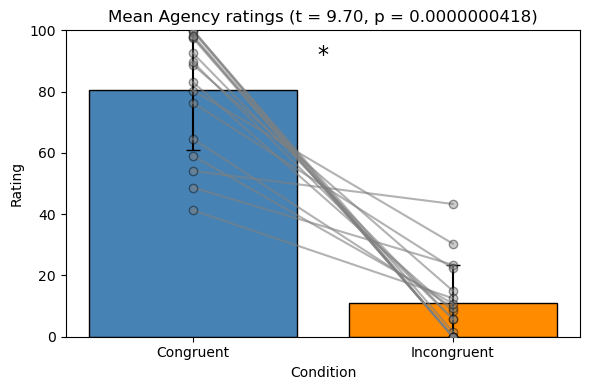

In [9]:
# Extract data
mean_a_rating_congruent = data['mean_a_rating_congruent'].values
mean_a_rating_incongruent = data['mean_a_rating_incongruent'].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(mean_a_rating_congruent, mean_a_rating_incongruent)

# Calculate means and standard deviations
means = [np.mean(mean_a_rating_congruent), np.mean(mean_a_rating_incongruent)]
errors = [np.std(mean_a_rating_congruent, ddof=1), np.std(mean_a_rating_incongruent, ddof=1)]

# X positions
x_positions = [0, 1]

# Start plot
plt.figure(figsize=(6, 4))

# Bar plot with error bars
colors = ['steelblue', 'darkorange']
plt.bar(x_positions, means, yerr=errors, capsize=5, color=colors, edgecolor='black',zorder=1)

# Add paired lines and gray dots
for i in range(len(subjects)):
    x = x_positions
    y = [mean_a_rating_congruent[i], mean_a_rating_incongruent[i]]
    plt.plot(x, y, color='gray', alpha=0.6, zorder=3)
    plt.scatter(x, y, color='gray', edgecolor='black', zorder=3, alpha =0.4)

# Add significance star if p < 0.05
if p_value < 0.05:
    # Define star position just above the taller bar
    max_y = max(means[0] + errors[0], means[1] + errors[1])
    star_y = max_y + 8  # height above the bar

    # Horizontal line
    #plt.plot([0, 1], [star_y, star_y], color='black', linewidth=1.2)
    
    # Star text
    plt.text(0.5, star_y - 20.55, '*', ha='center', va='bottom', fontsize=16)

# Tweak labels and layout
plt.xticks(x_positions, ['Congruent', 'Incongruent'])
plt.ylabel("Rating")
plt.xlabel("Condition")
plt.ylim(0,100)
plt.title(f"Mean Agency ratings (t = {t_stat:.2f}, p = {p_value:.10f})")
plt.tight_layout()
plt.show()


In [10]:
np.count_nonzero((mean_a_rating_congruent >=90) & (mean_a_rating_incongruent <= 10))
# number that shoot for the extremes

7

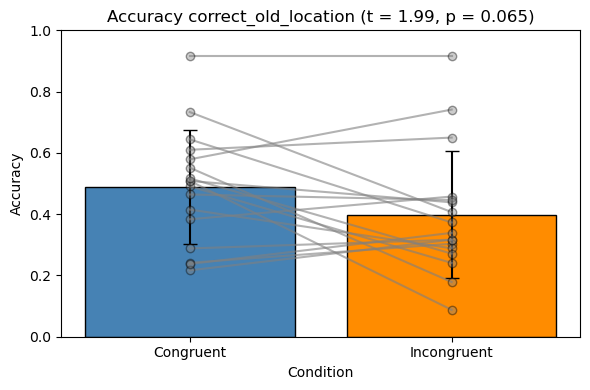

In [11]:
# Extract data
mean_a_rating_congruent = data["correctold_correctloc_congruent_rate"].values
mean_a_rating_incongruent = data["correctold_correctloc_incongruent_rate"].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(mean_a_rating_congruent, mean_a_rating_incongruent)

# Calculate means and standard deviations
means = [np.mean(mean_a_rating_congruent), np.mean(mean_a_rating_incongruent)]
errors = [np.std(mean_a_rating_congruent, ddof=1), np.std(mean_a_rating_incongruent, ddof=1)]

# X positions
x_positions = [0, 1]

# Start plot
plt.figure(figsize=(6, 4))

# Bar plot with error bars
colors = ['steelblue', 'darkorange']
plt.bar(x_positions, means, yerr=errors, capsize=5, color=colors, edgecolor='black',zorder=1)

# Add paired lines and gray dots
for i in range(len(subjects)):
    x = x_positions
    y = [mean_a_rating_congruent[i], mean_a_rating_incongruent[i]]
    plt.plot(x, y, color='gray', alpha=0.6, zorder=3)
    plt.scatter(x, y, color='gray', edgecolor='black', zorder=3, alpha =0.4)

# Add significance star if p < 0.05
if p_value < 0.05:
    # Define star position just above the taller bar
    max_y = max(means[0] + errors[0], means[1] + errors[1])
    star_y = max_y    # height above the bar

    # Horizontal line
    #plt.plot([0, 1], [star_y, star_y], color='black', linewidth=1.2)
    
    # Star text
    plt.text(0.5, star_y, '*', ha='center', va='bottom', fontsize=16)

# Tweak labels and layout
plt.xticks(x_positions, ['Congruent', 'Incongruent'])
plt.ylabel("Accuracy")
plt.xlabel("Condition")
plt.ylim(0,1)
plt.title(f"Accuracy correct_old_location (t = {t_stat:.2f}, p = {p_value:.3f})")
plt.tight_layout()
plt.show()

In [12]:
np.count_nonzero(mean_a_rating_congruent>=mean_a_rating_incongruent)
#10 people do better in cong, 7 people do better in incong

10

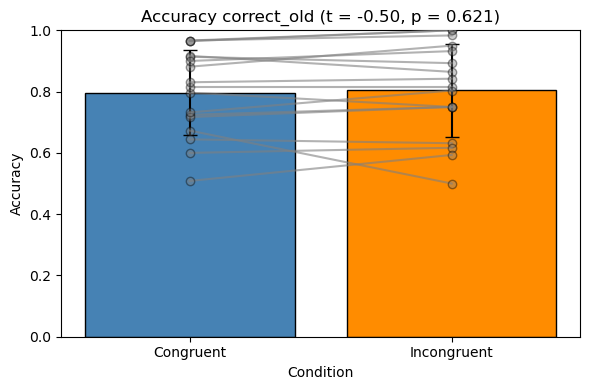

In [13]:
# Extract data
mean_a_rating_congruent = data["correctold_congruent_rate"].values
mean_a_rating_incongruent = data["correctold_incongruent_rate"].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(mean_a_rating_congruent, mean_a_rating_incongruent)

# Calculate means and standard deviations
means = [np.mean(mean_a_rating_congruent), np.mean(mean_a_rating_incongruent)]
errors = [np.std(mean_a_rating_congruent, ddof=1), np.std(mean_a_rating_incongruent, ddof=1)]

# X positions
x_positions = [0, 1]

# Start plot
plt.figure(figsize=(6, 4))

# Bar plot with error bars
colors = ['steelblue', 'darkorange']
plt.bar(x_positions, means, yerr=errors, capsize=5, color=colors, edgecolor='black',zorder=1)

# Add paired lines and gray dots
for i in range(len(subjects)):
    x = x_positions
    y = [mean_a_rating_congruent[i], mean_a_rating_incongruent[i]]
    plt.plot(x, y, color='gray', alpha=0.6, zorder=3)
    plt.scatter(x, y, color='gray', edgecolor='black', zorder=3, alpha =0.4)

# Add significance star if p < 0.05
if p_value < 0.05:
    # Define star position just above the taller bar
    max_y = max(means[0] + errors[0], means[1] + errors[1])
    star_y = max_y    # height above the bar

    # Horizontal line
    #plt.plot([0, 1], [star_y, star_y], color='black', linewidth=1.2)
    
    # Star text
    plt.text(0.5, star_y, '*', ha='center', va='bottom', fontsize=16)

# Tweak labels and layout
plt.xticks(x_positions, ['Congruent', 'Incongruent'])
plt.ylabel("Accuracy")
plt.xlabel("Condition")
plt.ylim(0,1)
plt.title(f"Accuracy correct_old (t = {t_stat:.2f}, p = {p_value:.3f})")
plt.tight_layout()
plt.show()

C:\Users\killg\AppData\Local\Temp\ipykernel_2580\601757154.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([ratings_old_new, ratings_left_right], labels=['Rating Old/New', 'Rating Left/Right'], patch_artist=True, widths=0.3)


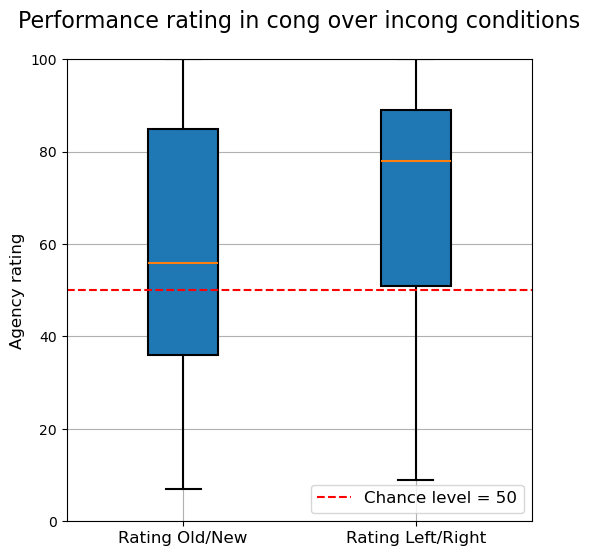

In [14]:
ratings_old_new = data["rating_for_oldnew"].values
ratings_left_right = data["rating_for_left_right"].values

t_stat_congruent, p_value_congruent= stats.ttest_1samp(ratings_old_new, 50)
t_stat_incongruent, p_value_incongruent= stats.ttest_1samp(ratings_left_right, 50)


# Plot using matplotlib only
plt.figure(figsize=(6, 6))
box = plt.boxplot([ratings_old_new, ratings_left_right], labels=['Rating Old/New', 'Rating Left/Right'], patch_artist=True, widths=0.3)
for element in ['boxes', 'whiskers', 'caps', 'medians']:
    for line in box[element]:
        line.set_linewidth(1.5)  
plt.axhline(50, color='red', linestyle='--', label='Chance level = 50')
plt.ylabel('Agency rating', fontsize = 12)
plt.title('Performance rating in cong over incong conditions', fontsize = 16, y=1.05)
plt.legend(fontsize = 12)
plt.grid(True)
plt.ylim(0,100)
plt.xticks(fontsize=12)
plt.show()



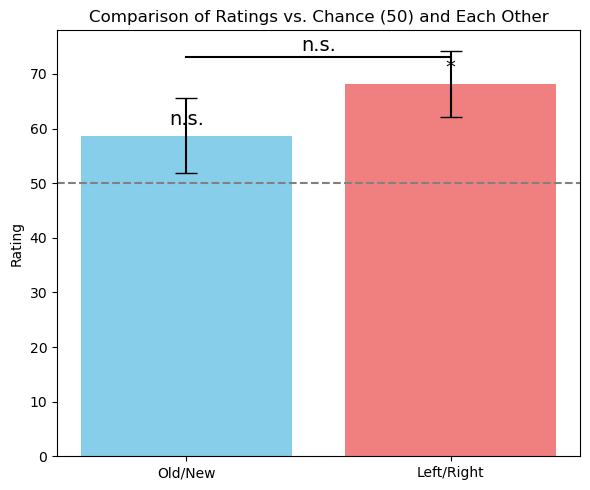

Old/New vs 50: t = 1.22, p = 0.2391
Left/Right vs 50: t = 2.90, p = 0.0105
Old/New vs Left/Right: t = -1.75, p = 0.0986


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_rel

ratings_old_new = data["rating_for_oldnew"].values
ratings_left_right = data["rating_for_left_right"].values

# One-sample t-tests against 50 (instead of 0.5)
t_oldnew, p_oldnew = ttest_1samp(ratings_old_new, 50)
t_leftright, p_leftright = ttest_1samp(ratings_left_right, 50)

# Paired t-test between the two conditions
t_paired, p_paired = ttest_rel(ratings_old_new, ratings_left_right)

# Plotting
labels = ['Old/New', 'Left/Right']
means = [np.mean(ratings_old_new), np.mean(ratings_left_right)]
errors = [np.std(ratings_old_new)/np.sqrt(len(ratings_old_new)),
          np.std(ratings_left_right)/np.sqrt(len(ratings_left_right))]

fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(labels, means, yerr=errors, capsize=8, color=['skyblue', 'lightcoral'])
ax.axhline(50, color='gray', linestyle='--', label='Chance level (50)')

def significance_annotation(pval):
    if pval < 0.001:
        return '***'
    elif pval < 0.01:
        return '**'
    elif pval < 0.05:
        return '*'
    else:
        return 'n.s.'

ax.text(0, means[0] + 2, significance_annotation(p_oldnew), ha='center', fontsize=14)
ax.text(1, means[1] + 2, significance_annotation(p_leftright), ha='center', fontsize=14)

y_max = max(means) + 5
ax.plot([0, 1], [y_max, y_max], color='black')
ax.text(0.5, y_max + 1, significance_annotation(p_paired), ha='center', fontsize=14)

ax.set_ylabel('Rating')
ax.set_title('Comparison of Ratings vs. Chance (50) and Each Other')
plt.tight_layout()
plt.show()

print("Old/New vs 50: t = {:.2f}, p = {:.4f}".format(t_oldnew, p_oldnew))
print("Left/Right vs 50: t = {:.2f}, p = {:.4f}".format(t_leftright, p_leftright))
print("Old/New vs Left/Right: t = {:.2f}, p = {:.4f}".format(t_paired, p_paired))


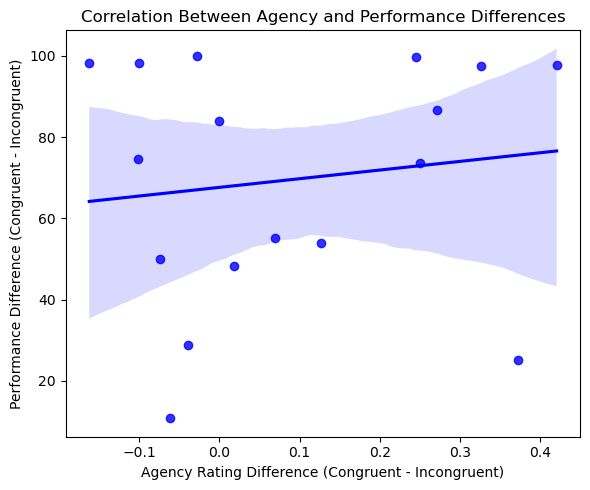

Pearson correlation: r = 0.13, p = 0.6056


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# Compute the differences
agency_ratings_diff = data["mean_a_rating_congruent"].values - data["mean_a_rating_incongruent"].values
performance_diff = data["correctold_correctloc_congruent_rate"].values - data["correctold_correctloc_incongruent_rate"].values

# Compute Pearson correlation
r, p = pearsonr(agency_ratings_diff, performance_diff)

# --- Plotting ---
plt.figure(figsize=(6, 5))
sns.regplot(x=performance_diff, y=agency_ratings_diff, color='blue', ci=95)

plt.xlabel("Agency Rating Difference (Congruent - Incongruent)")
plt.ylabel("Performance Difference (Congruent - Incongruent)")
plt.title("Correlation Between Agency and Performance Differences")

# Annotate correlation result
#plt.text(0.05, 0.95, f"r = {r:.2f}, p = {p:.4f}", ha='left', va='top', transform=plt.gca().transAxes,fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

# Print values
print(f"Pearson correlation: r = {r:.2f}, p = {p:.4f}")


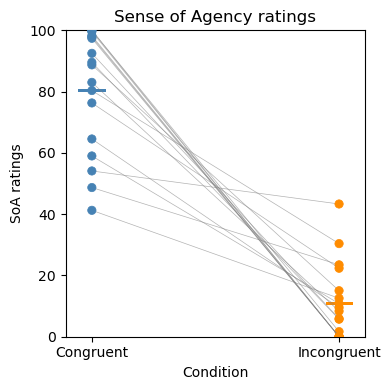

In [18]:
# Extract data
mean_a_rating_congruent = data['mean_a_rating_congruent'].values
mean_a_rating_incongruent = data['mean_a_rating_incongruent'].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(mean_a_rating_congruent, mean_a_rating_incongruent)

# Calculate means and standard deviations
means = [np.mean(mean_a_rating_congruent), np.mean(mean_a_rating_incongruent)]
errors = [np.std(mean_a_rating_congruent, ddof=1) /len(data), np.std(mean_a_rating_incongruent, ddof=1)/len(data)]

# X positions
x_positions = [0, 1]

# Start plot
plt.figure(figsize=(4, 4))

# Bar plot with error bars
colors = ['steelblue', 'darkorange']
#plt.bar(x_positions, means, yerr=errors, capsize=5, color=colors, edgecolor='black',zorder=1)

# Add paired lines and gray dots
for i in range(len(subjects)):
    x = x_positions
    y = [mean_a_rating_congruent[i], mean_a_rating_incongruent[i]]
    plt.plot(x, y, color='gray', alpha=0.6, zorder=3, linewidth = 0.5)
    plt.scatter(x, y, color=colors, edgecolor=colors, zorder=3, alpha =1, linewidth = 0.5)
    plt.plot([-0.05, 0.05], [means[0],means[0]], color='steelblue', linewidth=2)
    plt.plot([0.95, 1.05], [means[1],means[1]], color='darkorange', linewidth=2)

# Add significance star if p < 0.05
if p_value < 0.05:
    # Define star position just above the taller bar
    max_y = max(means[0] + errors[0], means[1] + errors[1])
    star_y = max_y + 8  # height above the bar

    # Horizontal line
    #plt.plot([0, 1], [star_y, star_y], color='black', linewidth=1.2)
    
    # Star text
    #plt.text(0.5, star_y - 20.55, '*', ha='center', va='bottom', fontsize=16)

# Tweak labels and layout
plt.xticks(x_positions, ['Congruent', 'Incongruent'])
plt.ylabel("SoA ratings")
plt.xlabel("Condition")
plt.ylim(0,100)
plt.title(f"Sense of Agency ratings")
plt.tight_layout()
plt.show()


In [ ]:
incorrectold_rate_MISS

NameError: name 'z_front' is not defined

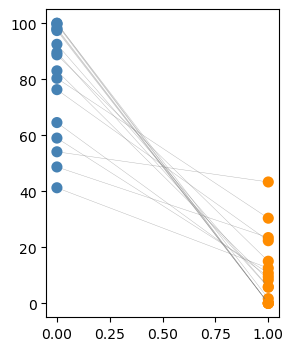

In [5]:
# Extract data
mean_a_rating_congruent = data['mean_a_rating_congruent'].values
mean_a_rating_incongruent = data['mean_a_rating_incongruent'].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(mean_a_rating_congruent, mean_a_rating_incongruent)

# Calculate means and standard errors
means = [np.mean(mean_a_rating_congruent), np.mean(mean_a_rating_incongruent)]
errors = [np.std(mean_a_rating_congruent, ddof=1) / np.sqrt(len(data)), 
          np.std(mean_a_rating_incongruent, ddof=1) / np.sqrt(len(data))]

# X positions
x_positions = [0, 1]

# Start plot
plt.figure(figsize=(3, 4))

# Bar colors
colors = ['steelblue', 'darkorange']

# Add paired lines and gray dots
for i in range(len(subjects)):
    x = x_positions
    y = [mean_a_rating_congruent[i], mean_a_rating_incongruent[i]]
    plt.plot(x, y, color='gray', alpha=0.6, zorder=1, linewidth=0.3)
    plt.scatter(x, y, color=colors, edgecolor=colors, zorder=1, alpha=1, linewidth=2)

# Plot mean lines with black outline and colored overlay
line_width = 2
outline_width = 4

# For each condition
for i, (x, mean, err, color) in enumerate(zip(x_positions, means, errors, colors)):
    # Mean line (black outline)
    #plt.plot([x - 0.05, x + 0.05], [mean, mean], color='black', linewidth=outline_width, zorder=5)
    # Mean line (color overlay)
    plt.plot([x - 0.08, x + 0.08], [mean, mean], color="black", linewidth=line_width, zorder=z_front+10)
    
    # Standard error band (± SEM)
    z_front = 5  # higher than other elements

    plt.plot([x, x], [mean - err, mean + err], color='black', linewidth=1.2, zorder=z_front+1)
    plt.plot([x - 0.03, x + 0.03], [mean - err, mean - err], color='black', linewidth=1.2, zorder=z_front-1)
    plt.plot([x - 0.03, x + 0.03], [mean + err, mean + err], color='black', linewidth=1.2, zorder=z_front-1)


# Add significance star if p < 0.05
if p_value < 0.05:
    # Define star position just above the taller bar
    max_y = max(means[0] + errors[0], means[1] + errors[1])
    star_y = max_y + 8  # height above the bar

    # Horizontal line
    #plt.plot([0, 1], [star_y, star_y], color='black', linewidth=1.2)

    # Star text
    #plt.text(0.5, star_y + 1.5, '*', ha='center', va='bottom', fontsize=16)

# Tweak labels and layout
plt.xticks(x_positions, ['Congruent', 'Incongruent'])
plt.ylabel("SoA ratings")
plt.xlabel("Condition")
plt.ylim(0, 100)
plt.title("Sense of Agency ratings")
plt.tight_layout()
plt.show()


In [54]:
# Get values
x = data["mean_a_rating_congruent"].values
y = data["mean_a_rating_incongruent"].values

# Paired t-test
t_stat, p_value = stats.ttest_rel(x, y)

# Compute Cohen's d for paired samples
diff = x - y
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")


p-value = 4.1822011928517096e-08
t statistic = 9.701
Cohen's d = 2.353


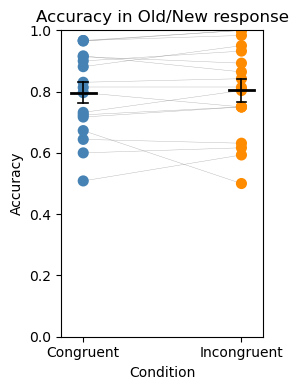

In [14]:
# Extract data
mean_a_rating_congruent = data['correctold_congruent_rate'].values
mean_a_rating_incongruent = data['correctold_incongruent_rate'].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(mean_a_rating_congruent, mean_a_rating_incongruent)

# Calculate means and standard errors
means = [np.mean(mean_a_rating_congruent), np.mean(mean_a_rating_incongruent)]
errors = [np.std(mean_a_rating_congruent, ddof=1) / np.sqrt(len(data)), 
          np.std(mean_a_rating_incongruent, ddof=1) / np.sqrt(len(data))]

# X positions
x_positions = [0, 1]

# Start plot
plt.figure(figsize=(3, 4))

# Bar colors
colors = ['steelblue', 'darkorange']

# Add paired lines and gray dots
for i in range(len(subjects)):
    x = x_positions
    y = [mean_a_rating_congruent[i], mean_a_rating_incongruent[i]]
    plt.plot(x, y, color='gray', alpha=0.6, zorder=1, linewidth=0.3)
    plt.scatter(x, y, color=colors, edgecolor=colors, zorder=1, alpha=1, linewidth=2)

# Plot mean lines with black outline and colored overlay
line_width = 2
outline_width = 4

# For each condition
for i, (x, mean, err, color) in enumerate(zip(x_positions, means, errors, colors)):
    # Mean line (black outline)
    #plt.plot([x - 0.05, x + 0.05], [mean, mean], color='black', linewidth=outline_width, zorder=5)
    # Mean line (color overlay)
    plt.plot([x - 0.08, x + 0.08], [mean, mean], color="black", linewidth=line_width, zorder=z_front+10)
    
    # Standard error band (± SEM)
    z_front = 5  # higher than other elements

    plt.plot([x, x], [mean - err, mean + err], color='black', linewidth=1.2, zorder=z_front+1)
    plt.plot([x - 0.03, x + 0.03], [mean - err, mean - err], color='black', linewidth=1.2, zorder=z_front-1)
    plt.plot([x - 0.03, x + 0.03], [mean + err, mean + err], color='black', linewidth=1.2, zorder=z_front-1)


# Add significance star if p < 0.05
if p_value < 0.05:
    # Define star position just above the taller bar
    max_y = max(means[0] + errors[0], means[1] + errors[1])
    star_y = max_y + 8  # height above the bar

    # Horizontal line
    #plt.plot([0, 1], [star_y, star_y], color='black', linewidth=1.2)

    # Star text
    #plt.text(0.5, star_y + 1.5, '*', ha='center', va='bottom', fontsize=16)

# Tweak labels and layout
plt.xticks(x_positions, ['Congruent', 'Incongruent'])
plt.ylabel("Accuracy")
plt.xlabel("Condition")
plt.ylim(0, 1)
plt.title("Accuracy in Old/New response")
plt.tight_layout()
plt.show()


In [15]:
# Get values
x = data["correctold_congruent_rate"].values
y = data["correctold_incongruent_rate"].values

# Paired t-test
t_stat, p_value = stats.ttest_rel(x, y)

# Compute Cohen's d for paired samples
diff = x - y
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value:.2f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")


p-value = 0.62
t statistic = -0.504
Cohen's d = -0.122


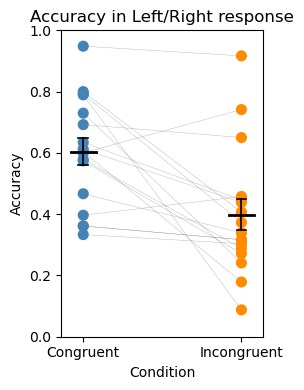

In [16]:
# Extract data
mean_a_rating_congruent = data['correctold_correctloc_congruent_rate'].values
mean_a_rating_incongruent = data['correctold_correctloc_incongruent_rate'].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(mean_a_rating_congruent, mean_a_rating_incongruent)

# Calculate means and standard errors
means = [np.mean(mean_a_rating_congruent), np.mean(mean_a_rating_incongruent)]
errors = [np.std(mean_a_rating_congruent, ddof=1) / np.sqrt(len(data)), 
          np.std(mean_a_rating_incongruent, ddof=1) / np.sqrt(len(data))]

# X positions
x_positions = [0, 1]

# Start plot
plt.figure(figsize=(3, 4))

# Bar colors
colors = ['steelblue', 'darkorange']

# Add paired lines and gray dots
for i in range(len(subjects)):
    x = x_positions
    y = [mean_a_rating_congruent[i], mean_a_rating_incongruent[i]]
    plt.plot(x, y, color='gray', alpha=0.6, zorder=1, linewidth=0.3)
    plt.scatter(x, y, color=colors, edgecolor=colors, zorder=1, alpha=1, linewidth=2)

# Plot mean lines with black outline and colored overlay
line_width = 2
outline_width = 4

# For each condition
for i, (x, mean, err, color) in enumerate(zip(x_positions, means, errors, colors)):
    # Mean line (black outline)
    #plt.plot([x - 0.05, x + 0.05], [mean, mean], color='black', linewidth=outline_width, zorder=5)
    # Mean line (color overlay)
    z_front = 5
    plt.plot([x - 0.08, x + 0.08], [mean, mean], color="black", linewidth=line_width, zorder=z_front+10)
    
    # Standard error band (± SEM)
      # higher than other elements

    plt.plot([x, x], [mean - err, mean + err], color='black', linewidth=1.2, zorder=z_front+1)
    plt.plot([x - 0.03, x + 0.03], [mean - err, mean - err], color='black', linewidth=1.2, zorder=z_front-1)
    plt.plot([x - 0.03, x + 0.03], [mean + err, mean + err], color='black', linewidth=1.2, zorder=z_front-1)


# Add significance star if p < 0.05
if p_value < 0.05:
    # Define star position just above the taller bar
    max_y = max(means[0] + errors[0], means[1] + errors[1])
    star_y = max_y + 8  # height above the bar

    # Horizontal line
    #plt.plot([0, 1], [star_y, star_y], color='black', linewidth=1.2)

    # Star text
    #plt.text(0.5, star_y + 1.5, '*', ha='center', va='bottom', fontsize=16)

# Tweak labels and layout
plt.xticks(x_positions, ['Congruent', 'Incongruent'])
plt.ylabel("Accuracy")
plt.xlabel("Condition")
plt.ylim(0, 1)
plt.title("Accuracy in Left/Right response")
plt.tight_layout()
plt.show()


In [8]:
# Get values
x = data["correctold_correctloc_congruent_rate"].values
y = data["correctold_correctloc_incongruent_rate"].values

# Paired t-test
t_stat, p_value = stats.ttest_rel(x, y)

# Compute Cohen's d for paired samples
diff = x - y
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value:.2f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")


p-value = 0.00
t statistic = 3.773
Cohen's d = 0.915
